# ZOMATO DATA ANALYSIS

I got the very interesting zomato data for the city Pune, we have lots of features telling lots of stories about the food habits in pune.
I am curious to know the answers of some of the questions like...

This is data(zomato_outlet_final.csv) of Zomato in Pune city and we would like to know some details about the data.

<b>
    
Ques-1 Which are the best rated restaurants in Pune?

Ques-2 Which is the best rated location for food in Pune?

Ques-3 What is most liked cuisine in Pune?

Ques-4 Which are the cheap but best restaurants in Pune?

Ques-5 Which restaurant serves the best "BIRYANI" in Pune?

Ques-6 Baner being my favourite place in Pune, Which are the best restaurants in Baner?
    
</b>

and so many other questions i have...
    



Lets explore this data and try to find the answers of these questions...


In [1]:
#importing libraries
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt





In [2]:
#removing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the csv file
df= pd.read_csv("zomato_outlet_final (11).csv")
df.tail(5)

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,Unnamed: 9,Cost (RS),cost,liked
5428,https://www.zomato.com/pune/murli-pure-veg-1-s...,Murli Pure Veg\r\n ...,Casual Dining,Sinhgad Road,3.1,-22,3.5,-253,"South Indian,Chinese,North Indian,",NaN,550,Rs. 550,NaN
5429,https://www.zomato.com/pune/the-irani-cafe-res...,The Irani Cafe Restaurant\r\n ...,Casual Dining,Viman Nagar,2.9,(80 Reviews),NaN,NaN,"Mughlai,Iranian,",NaN,800,Rs. 800,"Naan, Mutton Keema, Dum Biryani, Irani Chai, B..."
5430,https://www.zomato.com/pune/hotel-shilpa-gavra...,Hotel Shilpa Gavran\r\n ...,Casual Dining,Pimpri,3.8,(90 Reviews),NaN,NaN,"Chinese,Fast Food,North Indian,",NaN,500,Rs. 500,"Mutton Thali, Chicken Sukha"
5431,https://www.zomato.com/pune/mh-12-pav-bhaji-ju...,MH 12 Pav Bhaji & Juice Center\r\n ...,Quick Bites,Sadashiv Peth,3.1,-24,3.1,-439,"Beverages,Chinese,Street Food,Fast Food,",NaN,250,Rs. 250,NaN
5432,https://www.zomato.com/pune/liyo-china-bt-kawa...,Liyo China\r\n ...,Casual Dining,B.T. Kawade Road,3.6,-97,3.8,-365,"Thai,Chinese,",NaN,500,Rs. 500,Noodle


In [4]:
df.columns

Index(['link', 'rest_name', 'rest_type', 'loc', 'dine_rating', 'dine_reviews',
       'delivery_rating', 'delivery_reviews', 'cuisine', 'Unnamed: 9',
       'Cost (RS)', 'cost', 'liked'],
      dtype='object')

In [5]:
#removing the unncessary column "link"
df=df.drop(['link','Unnamed: 9'],axis=1)
df.head()

#deleting the row. axis=0
#deleting the columns, axis=1

,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,Cost (RS),cost,liked
0,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,(707 Reviews),NaN,NaN,"North Indian,Continental,Asian,Finger Food,",4300,Rs. 4300,"Cocktails, Chaat, Beer"
1,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,(344 Reviews),NaN,NaN,"North Indian,Mughlai,",3500,Rs. 3500,"Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,(541 Reviews),NaN,NaN,"Mediterranean,Asian,North Indian,",3200,Rs. 3200,"Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,(55 Reviews),NaN,NaN,"Asian,European,North Indian,",3200,Rs. 3200,"Vanilla Ice Cream, Chaat, Sushi"
4,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,(113 Reviews),NaN,NaN,"Finger Food,Continental,",3100,Rs. 3100,"Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


In [6]:
#we have 5433 restaurats in our data, including small tapris, medium size restaurants,
#Bakeries, Dessert Parlours, Cake Shops, Bars, Big Restaurants, Casual Dinings etc.
df.shape

(5433, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rest_name         5433 non-null   object 
 1   rest_type         4336 non-null   object 
 2   loc               5433 non-null   object 
 3   dine_rating       5433 non-null   float64
 4   dine_reviews      4829 non-null   object 
 5   delivery_rating   2539 non-null   float64
 6   delivery_reviews  2539 non-null   object 
 7   cuisine           5433 non-null   object 
 8   Cost (RS)         5433 non-null   int64  
 9   cost              5433 non-null   object 
 10  liked             2603 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 467.0+ KB


We have some null values in some colums, we will handle them step by step

In [8]:
# lets find the duplicates in the data

df.duplicated().sum()


250

In [9]:
#we have 250 rows which are duplicates, lets remove the duplicate values

df=df.drop_duplicates()
df.shape

#after removing duplicate rows, we got 5183 restaurants in our dataset

(5183, 11)

# Exploratory Data Analysis

Lets do the EDA on Zomato to understand the data in depth.

We gonna do Univariate Data Analysis and Bivariate Data Analysis



# FEATURE-1(dine_rating)

Text(0, 0.5, 'count of restaurants')

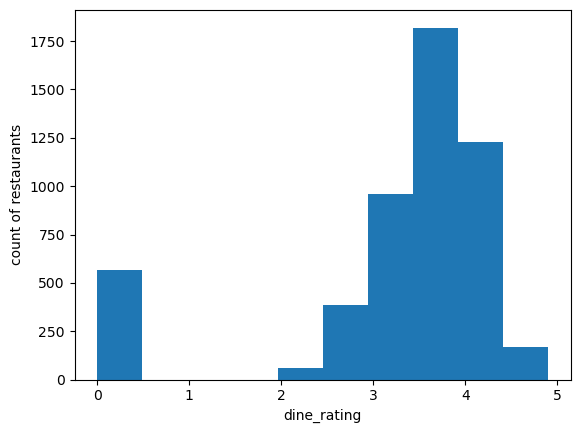

In [10]:
#lets plot the histogram
plt.hist(df['dine_rating'])
plt.xlabel("dine_rating")#
plt.ylabel("count of restaurants")

# OBSERVATIONS

1.More than 500 restaurnants have 0 ratings

2.Most of the restaurants got rating between 3.5 to 4 and thats a good news for zomato.

3.There are no restaurants which got 1 as a rating in our data.

(array([  2.,   0.,  19.,  74., 146., 377., 938., 641., 190.,  22.]),
 array([2.  , 2.28, 2.56, 2.84, 3.12, 3.4 , 3.68, 3.96, 4.24, 4.52, 4.8 ]),
 <BarContainer object of 10 artists>)

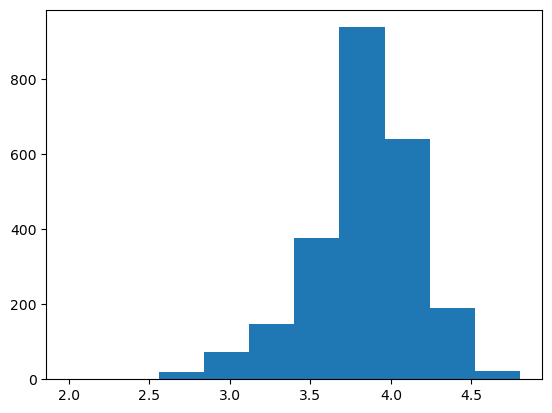

In [11]:
plt.hist(df['delivery_rating'])


### Observation

1. No restaurant have less than 2.5 delivery rating.

2. More than 800 restaurants have delivery rating between 3.7 to 4.0

3. More than 800 restaurants have delivery rating between 4 to 4.5

In [12]:
df.columns

Index(['rest_name', 'rest_type', 'loc', 'dine_rating', 'dine_reviews',
       'delivery_rating', 'delivery_reviews', 'cuisine', 'Cost (RS)', 'cost',
       'liked'],
      dtype='object')

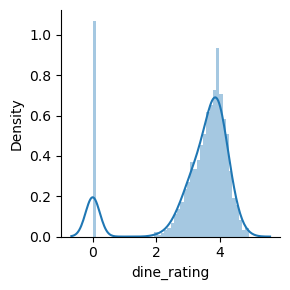

In [13]:
#probability density function

sns.FacetGrid(df, height=3) \
   .map(sns.distplot, "dine_rating")
plt.show()

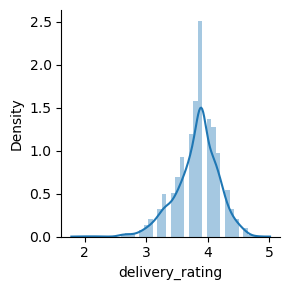

In [14]:
sns.FacetGrid(df, height=3) \
   .map(sns.distplot, "delivery_rating")
plt.show()

(array([  2.,   0.,  19.,  74., 146., 377., 938., 641., 190.,  22.]),
 array([2.  , 2.28, 2.56, 2.84, 3.12, 3.4 , 3.68, 3.96, 4.24, 4.52, 4.8 ]),
 <BarContainer object of 10 artists>)

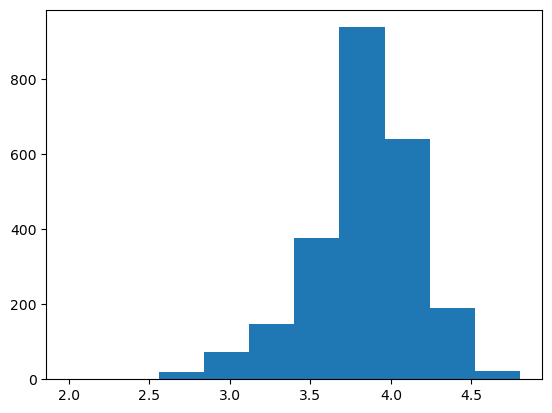

In [15]:
plt.hist(df.delivery_rating)

0.0    566
3.9    495
3.8    384
4.0    375
3.7    345
3.6    326
4.1    309
4.2    270
3.5    270
3.4    241
3.3    200
3.1    195
3.2    178
4.3    171
3.0    144
2.9    124
4.4    102
2.8     92
4.5     84
2.7     73
2.6     60
4.6     44
2.5     35
2.4     22
4.7     16
2.3     16
4.8     12
2.0     11
4.9     10
2.2     10
2.1      3
Name: dine_rating, dtype: int64


<Axes: xlabel='dine_rating', ylabel='Count'>

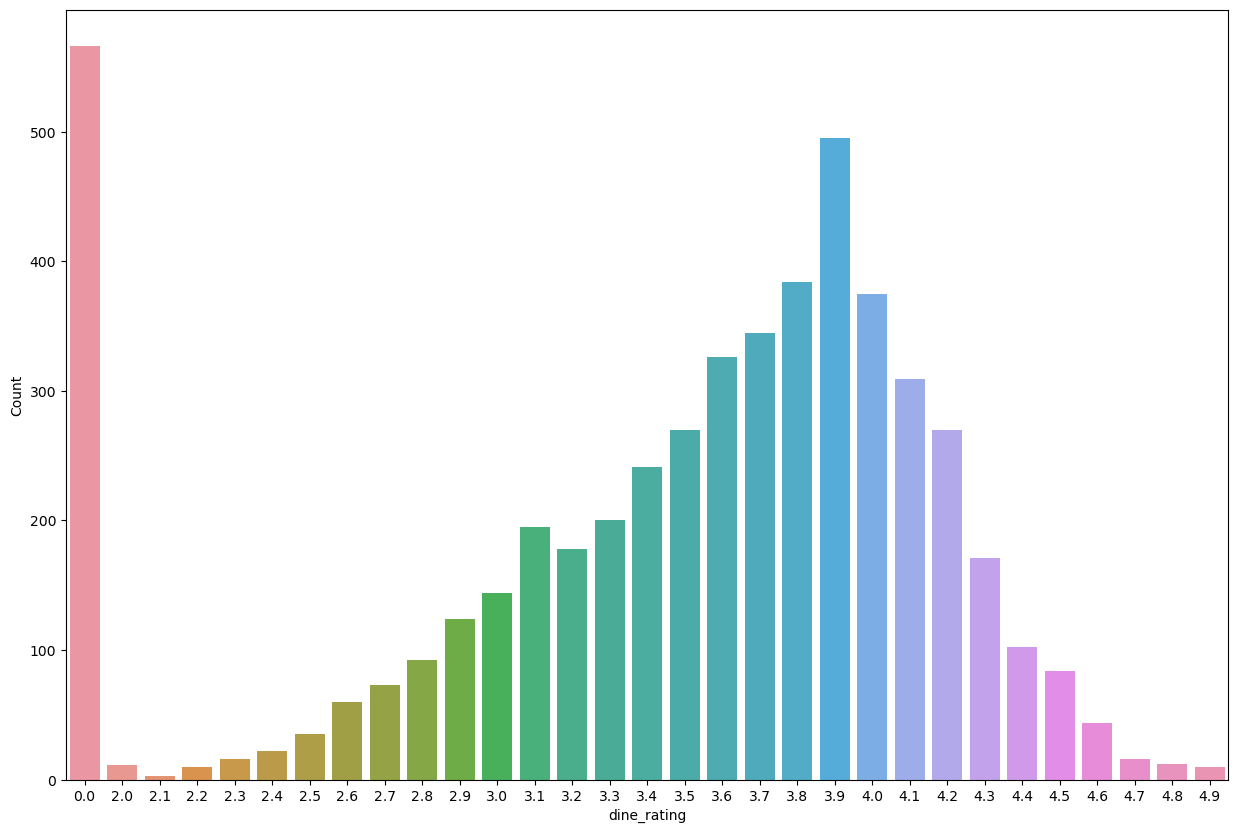

In [16]:
#bar plot
dine=df['dine_rating'].value_counts()
print(dine)
plt.figure(figsize=(15,10))

plt.xlabel("dine_rating")
plt.ylabel("Count")
sns.barplot(x=dine.index,y=dine.values)
#sns.barplot(x,y)

3.9    446
3.8    280
4.0    242
4.1    227
3.7    212
4.2    172
3.6    164
3.5    123
4.3     96
3.4     90
3.3     88
4.4     58
3.2     58
3.1     37
4.5     36
3.0     24
4.6     18
2.9     13
2.7      7
2.6      6
2.8      6
4.7      3
4.8      1
2.0      1
2.2      1
Name: delivery_rating, dtype: int64


<Axes: xlabel='delievery_rating', ylabel='Count'>

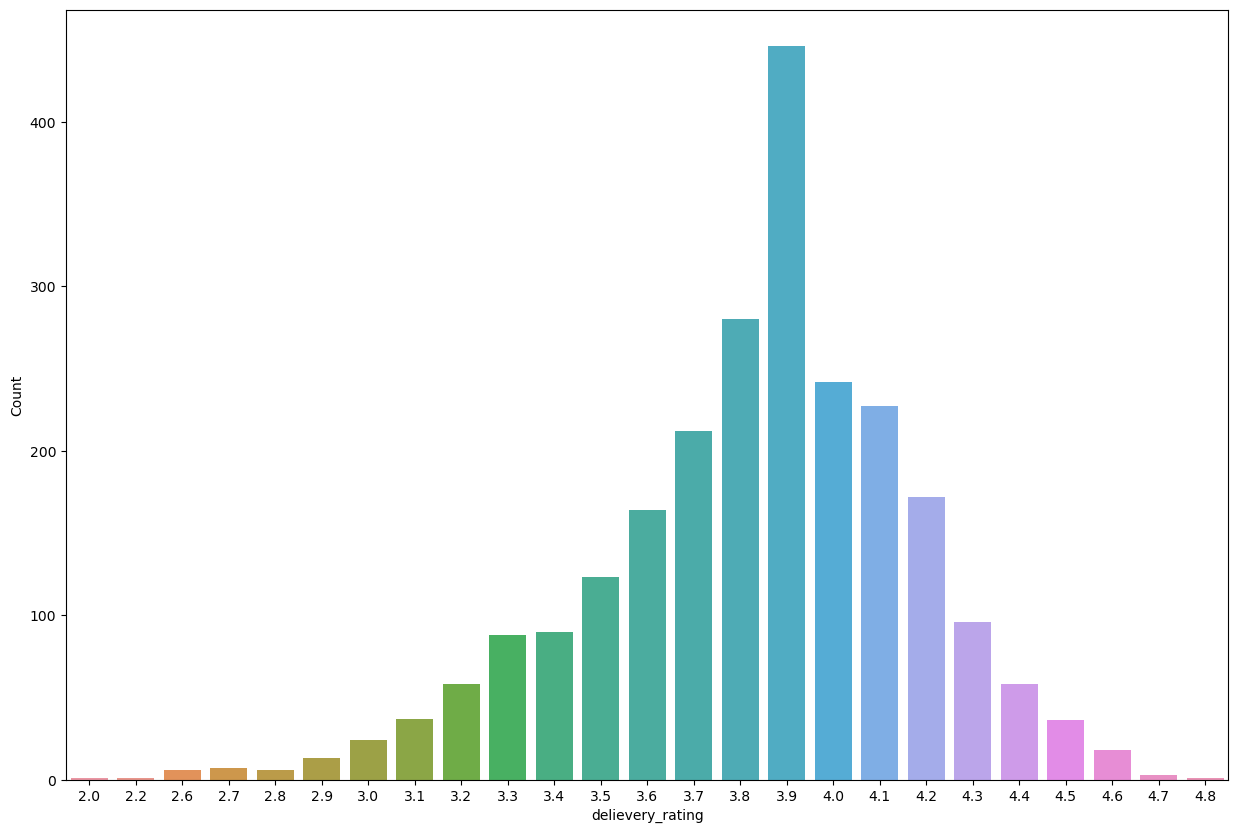

In [17]:
dine2=df['delivery_rating'].value_counts()
print(dine2)
plt.figure(figsize=(15,10))

plt.xlabel("delievery_rating")
plt.ylabel("Count")
sns.barplot(x=dine2.index,y=dine2.values)
#sns.barplot(x,y)

# Observation

1. Most of the restarants have an average of 3.9 rating.


2. There are lots of restaurants which got 0 ratings.



<Axes: xlabel='dine_rating'>

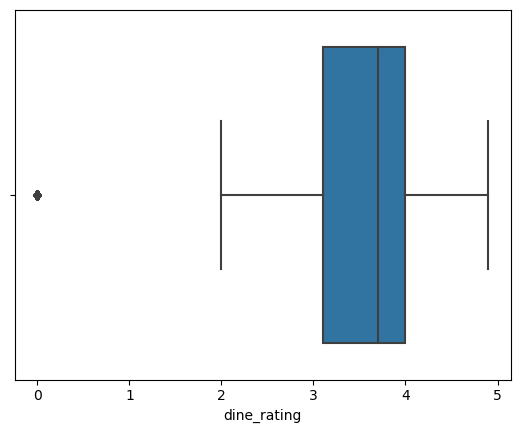

In [18]:
#box plot

sns.boxplot(df, x = df['dine_rating'])

# Observation

1. 25% of the restaurant's dine ratings on zomato is less than 3.


2. 50% of the restaurant's dine ratings on zomato is approximately less tha 3.8.


3. 75% of the restaurant's dine rating on zomato is less than 4.


4. 50% of the restaurants have rating between 3 to 4 and thats a good news for a company like Zomato.

# Feature-2(Rest_type- Restaurant_type)

In [19]:
print(len(df['rest_type'].unique()))

67


There are 67 types of restaurant types in pune

In [20]:
#lets count the number of each Type
df['rest_type'].value_counts()

Quick Bites                   1467
Casual Dining                  911
Bakery                         329
Dessert Parlor                 308
Casual Dining,Bar              241
                              ... 
Casual Dining,Bakery             1
Kiosk,Quick Bites                1
Dhaba,Bar                        1
Microbrewery,Casual Dining       1
Paan Shop                        1
Name: rest_type, Length: 66, dtype: int64

# Which Types of restaurants are leaders in pune?

In [21]:
rest_type_values=df['rest_type'].value_counts()[:10]
print(rest_type_values)

Quick Bites              1467
Casual Dining             911
Bakery                    329
Dessert Parlor            308
Casual Dining,Bar         241
Café                      204
Bar,Casual Dining         126
Bakery,Dessert Parlor      69
Sweet Shop                 54
Beverage Shop              54
Name: rest_type, dtype: int64


<Axes: >

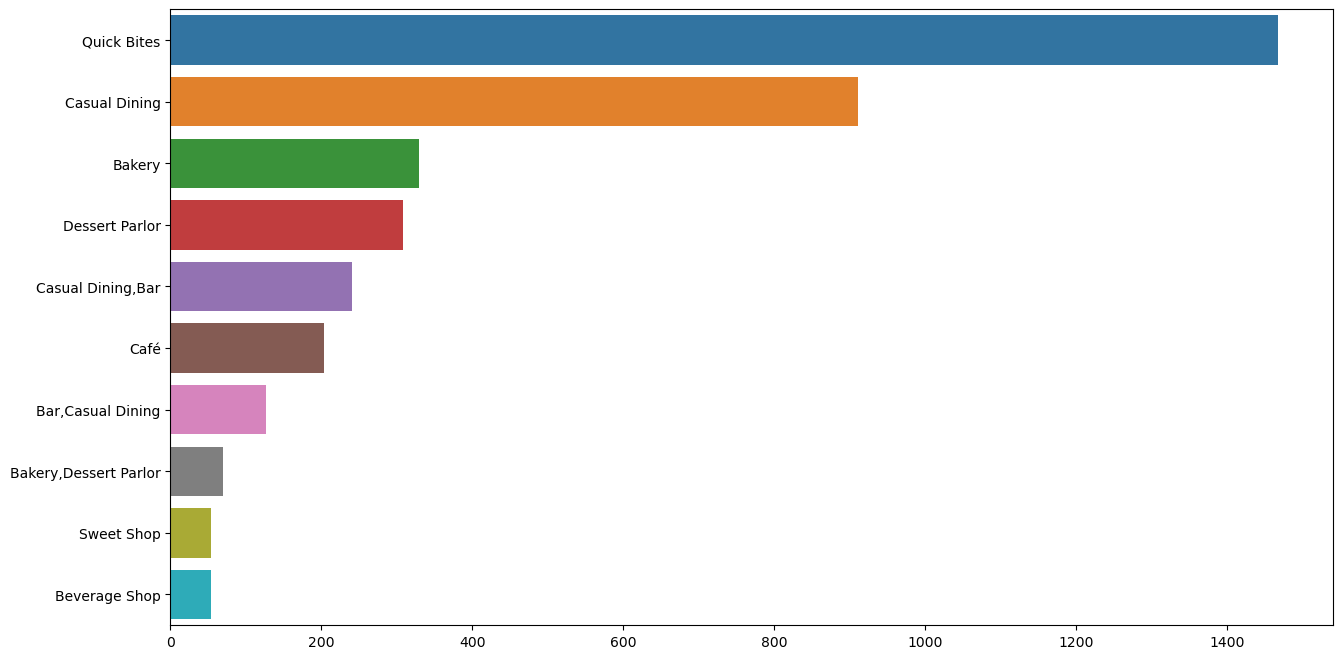

In [22]:
plt.figure(figsize=(15,8))

sns.barplot(x=rest_type_values.values,y=rest_type_values.index)

We can see, there are mostly quick bites restaurants, followed by casual dining and bakery

(-1.0999991332514731,
 1.0999999587262606,
 -1.0999996749570857,
 1.0999935062037256)

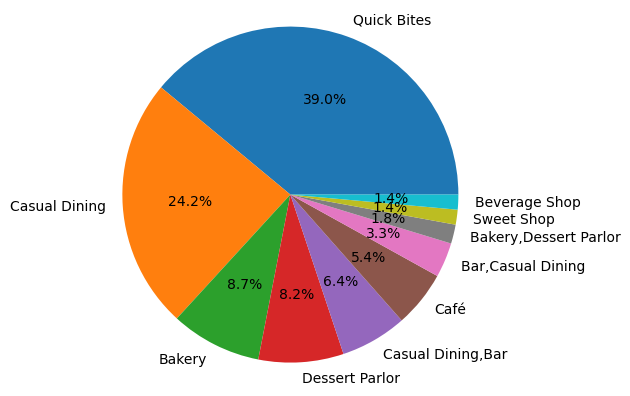

In [23]:
#pie chart


labels = rest_type_values.index
sizes =rest_type_values.values 

plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.axis('equal')

# Observation

1. 39% of the restaurants in pune are Quick bites.


2. 24.2% of the restaurants in pune are Casual dining.


3. 8.7 % of the restaurants in pune are Bakeries.

# Feature-3(Cuisines)

In [24]:
# we can see that a restaurant can have multiple cuisine
df['cuisine']

0       North Indian,Continental,Asian,Finger Food,
1                             North Indian,Mughlai,
2                 Mediterranean,Asian,North Indian,
3                      Asian,European,North Indian,
4                          Finger Food,Continental,
                           ...                     
5428             South Indian,Chinese,North Indian,
5429                               Mughlai,Iranian,
5430                Chinese,Fast Food,North Indian,
5431       Beverages,Chinese,Street Food,Fast Food,
5432                                  Thai,Chinese,
Name: cuisine, Length: 5183, dtype: object

# Lets see what all cuisine Pune serves to us...

In [25]:
#NUMBER OF CUISINE IN PUNE
cuisine=[]
for i in df['cuisine']:
    for j in i.split(","):
        if j not in cuisine:
            cuisine.append(j)
print(cuisine)
print(len(cuisine))

#there are 92 total cuisine in all the restaurant in pune

['North Indian', 'Continental', 'Asian', 'Finger Food', '', 'Mughlai', 'Mediterranean', 'European', 'Salad', 'Malaysian', 'Vietnamese', 'Thai', 'Chinese', 'Japanese', 'Biryani', 'Kebab', 'Italian', 'Bar Food', 'Seafood', 'Fast Food', 'Healthy Food', 'Mexican', 'Desserts', 'American', 'Greek', 'Maharashtrian', 'Beverages', 'South American', 'Steak', 'Brazilian', 'Malwani', 'South Indian', 'Chettinad', 'Kerala', 'Mangalorean', 'Pizza', 'Iranian', 'Goan', 'Charcoal Chicken', 'Cafe', 'Modern Indian', 'Korean', 'Sushi', 'Cantonese', 'Momos', 'Bakery', 'Tea', 'BBQ', 'Mongolian', 'Tex-Mex', 'Lebanese', 'Street Food', 'Cuisine Varies', 'Sandwich', 'Middle Eastern', 'African', 'Ethiopian', 'Burger', 'Hyderabadi', 'Parsi', 'German', 'Konkan', 'Rolls', 'Singaporean', 'Indonesian', 'Rajasthani', 'Lucknowi', 'Burmese', 'Bengali', 'Ice Cream', 'Kashmiri', 'Arabian', 'Gujarati', 'French', 'Tibetan', 'Coffee', 'Mithai', 'Bihari', 'Wraps', 'Odia', 'Juices', 'Raw Meats', 'Turkish', 'Frozen Yogurt', 'Awa

In [26]:
a="hey this is nishesh"
b=a.split(" ")
print(b)

['hey', 'this', 'is', 'nishesh']


We can see there are lots of cuisines in pune, some of them are are not cuisines like Coffee, Mithai etc but in data we have it like that


# Total number of restaurants serving biryani in Pune

In [27]:
count=0
for i in df['cuisine']:
    for j in i.split(","):
        if j =="Biryani":
            count += 1
print(count)

#There are 566 restaurant in pune which serves biryani

566


In [28]:
dfnew=df[["cuisine","rest_name"]]
dfnew.head(30)

,cuisine,rest_name
0,"North Indian,Continental,Asian,Finger Food,",Mix@36 - The Westin\r\r\n ...
1,"North Indian,Mughlai,",Kangan - The Westin\r\r\n ...
2,"Mediterranean,Asian,North Indian,",Coriander Kitchen - Conrad Pune\r\r\n ...
3,"Asian,European,North Indian,",The Market - The Westin\r\r\n ...
4,"Finger Food,Continental,",Vandaag - Vivanta Pune\r\r\n ...
5,"Salad,Asian,Malaysian,Vietnamese,Thai,Chinese,",Baan Tao - Hyatt Pune\r\r\n ...
6,"North Indian,",Zeera - Conrad Pune\r\r\n ...
7,"Thai,Japanese,Chinese,",Koji - Conrad Pune\r\r\n ...
8,"European,Asian,North Indian,",Feast - Sheraton Grand\r\r\n ...
9,"Mughlai,Biryani,Kebab,North Indian,",Aasmana: The Ritz-Carlton\r\r\n ...


In [30]:
rest_name=[]
for i,k in enumerate(df["cuisine"]):
    for j in k.split(","):
        if j =="Biryani":
            rest_name.append(df["rest_name"][i])
            
print(rest_name)

KeyError: 837

In [33]:
df["rest_name"][0]

'Mix@36 - The Westin\r\r\n                                    '

In [34]:
df['cuisine'][0]

'North Indian,Continental,Asian,Finger Food,'

# Total number of restaurants serving North Indian Food in Pune

In [32]:
count=0
for i in df['cuisine']:
    for j in i.split(","):
        if j =="North Indian":
            count=count+1
print(count)

#There are 2057 restaurants out of 5183 restaurants(almost 40%) which serves North Indian Food

2057


In [ ]:
list_res=[]
d={}
for i in df["cuisine"]:
    for j in i.split(","):
        list_res.append(j)

        
for i in list_res:
    if i in d:
        d[i]+=1
    else:
        d[i]=1
        
for w in sorted(d, key=d.get, reverse=True):
    print(w, d[w])

        
        

In [ ]:
list_res=[]
d={}
for i in df["cuisine"]:
    for j in i.split(","):
        list_res.append(j)
print(list_res)

# Feature-4(loc-location where the restaurant is situated)

In [ ]:
total_locations=df['loc'].value_counts()
top_total_locations=df['loc'].value_counts()[:10]
print(top_total_locations)

places=top_total_locations.index

#these are the location with the maximum number of restaurants in pune

In [ ]:
sns.barplot(top_total_locations,places)

# Observation

Kothrud has the maximum number of restaurants followed by wakad and viman nagar

In [ ]:
labels = top_total_locations.index
sizes =top_total_locations.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

# Observation

1. Kothrud covers 13.8% of top 10 locations in pune.


2. Viman Nagar and Baner covers almost 11.5% of the top 10 locations in pune

# FEATURE-5(delivery_rating)

In [ ]:
deliver=df['delivery_rating'].value_counts()
deliver

In [ ]:
plt.figure(figsize=(15,8))


sns.barplot(deliver.index,deliver)

# Observation

1.Most of the restaurant gets 3.9 delievery rating

2.There are very few restaurants who get less than 2.5 rating.



In [ ]:
#lets plot the histogram
plt.hist(df['delivery_rating'])
plt.xlabel("delivery_rating")
plt.ylabel("count of restaurants")



In [ ]:
#box plot

sns.boxplot(df['delivery_rating'])

# Observation

1. 25% of the delivery rating is less than 3.5


2. 50% of the delivery rating is less than 2.9


3. 75% of the delivery rating is less than 4.2


4. We can clearly observe that 50% of the delivery rating lies between 3.6 to 4.1 and thats a good news for Zomato.

In [ ]:
df.columns

# Feature-5 Cost (RS)

We are assuming that this is the average cost of 2 people.


In [ ]:
cost=df['Cost (RS)'].value_counts()
cost

In [ ]:
plt.figure(figsize=(15,8))


sns.barplot(cost.index,cost)

# Observation

1. There are 759 restaurants which that cost Rs300 for 2 people.


2. There are 624 restaurants which that cost Rs400 for 2 people.

In [ ]:
#lets plot the histogram
plt.hist(df['Cost (RS)'])




In [ ]:
sns.boxplot(df['Cost (RS)'])

# Observation

1. 25% of the restaurants cost less than 300 rupees for 2 people.


2. 50% of the restaurants cost less than 400 rupees for 2 people.


3. 75% of the restaurants cost less than 850 rupees for 2 people.


4. Obviously there are some outliers restaurants which cost more than 2000 , some even cost 5000.


In [ ]:
#scatter plot
sns.scatterplot(df["Cost (RS)"],df["delivery_rating"])

# Observation

1. There are obviously more ratings for the food which cost less than Rs500.


2. There are also restaurants which cost almost 2000 but has delivery_rating less than 3.

In [ ]:
sns.scatterplot(df["Cost (RS)"],df["dine_rating"])

# Observation

1. Obviosly there are more ratings for the food which cost less than 1000.


2. There are restaurants which does have rating irrespective of cost.


3. As cost increases, rating moves to 3 to 5, it means people are rating high to costly restaurnts.

# Let's do some more Questions

Q1. Create a dataframe for all the restaurants
    which belong to KOTHRUD?
    
Q2. Which are the highly rated restaurants in BANER?

Q3. Which are restaurtants which got 0 rating 
    the city PUNE?
    
Q4. Return the location in pune with the best restaurants?

Q5. Plot the bar chart of top 10 locations rating wise in 
    pune?



# Dataframe for all the restaurants which belong to KOTHRUD?

In [ ]:
#q-1  Create a dataframe for all the restaurants which belong to KOTHRUD?
#ques-2 create a dataframe which have all the restaurants which belongs to Fc
#road and rating is greater than 4.
df_kothrud=df[(df['loc']=='FC Road') & (df['dine_rating']>4) ]
df_kothrud 

In [ ]:
df_kothrud.shape

# HOW MANY RESTAURANTS IN KOTHRUD HAVE MORE THAN 4.2 RATING?



In [ ]:
df_kothrud[df_kothrud['delivery_rating']>4.2]

# TOP RATED RESTAURANTS IN BANER

In [35]:
df_baner=df[df['loc']=='Baner']
df_baner

,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,Cost (RS),cost,liked
58,Effingut\r\r\n ...,Pub,Baner,4.7,"-2,894",4.5,-649,"Asian,Italian,Mughlai,North Indian,Continental,",2000,Rs. 2000,"Apple Cider, Craft Beer, Nachos, Cocktails, Bu..."
72,The K Factory\r\r\n ...,"Casual Dining,Lounge",Baner,4.6,"-3,742",3.9,-252,"Beverages,Biryani,Charcoal Chicken,Salad,Desse...",2000,Rs. 2000,"Pasta, Salad, Cheesecake, Cocktails, Pizza, Pe..."
120,Mr Rabbit's Bar & Burrow\r\r\n ...,"Bar,Casual Dining",Baner,4.5,(633 Reviews),NaN,NaN,"South Indian,European,Continental,Finger Food,",1800,Rs. 1800,"Cocktails, Tiramisu, Ravioli, Beer, Murgh Ghee..."
142,Urbo\r\r\n,"Lounge,Casual Dining",Baner,4.2,(952 Reviews),NaN,NaN,"North Indian,Continental,",1700,Rs. 1700,"Pizza, Cocktails, Mocktails, Brownie, Paneer T..."
166,The Urban Foundry\r\r\n ...,"Bar,Casual Dining",Baner,4.6,"(3,912 Reviews)",NaN,NaN,"Fast Food,Asian,North Indian,Bar Food,",1600,Rs. 1600,"Cocktails, Pizza, Beer, Soya Chaap, Mocktails,..."
...,...,...,...,...,...,...,...,...,...,...,...
5386,"I'm Lion, Strictly Non-Veg\r\n ...",Casual Dining,Baner,4.2,-271,4.0,-355,"Konkan,Seafood,Goan,Mangalorean,",800,Rs. 800,"Sea Food, Neer Dosa, Sol Kadhi, Fry Prawns, Su..."
5390,The Curious Kitchen & Bar\r\n ...,"Casual Dining,Bar",Baner,4.2,-248,3.6,-842,"Italian,Continental,Chinese,North Indian,",900,Rs. 900,"Mocktails, Brownie, Caramel Custard, Paan Moji..."
5417,Punjabi Rasoi\r\n ...,NaN,Baner,4.0,(137 Reviews),NaN,NaN,"North Indian,",300,Rs. 300,NaN
5418,Tokyo Bakery\r\n ...,Bakery,Baner,4.0,(49 Reviews),NaN,NaN,"Bakery,",150,Rs. 150,NaN


In [36]:
df_baner_top=df_baner[df_baner["dine_rating"]>4.2]
df_baner_top

,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,Cost (RS),cost,liked
58,Effingut\r\r\n ...,Pub,Baner,4.7,"-2,894",4.5,-649,"Asian,Italian,Mughlai,North Indian,Continental,",2000,Rs. 2000,"Apple Cider, Craft Beer, Nachos, Cocktails, Bu..."
72,The K Factory\r\r\n ...,"Casual Dining,Lounge",Baner,4.6,"-3,742",3.9,-252,"Beverages,Biryani,Charcoal Chicken,Salad,Desse...",2000,Rs. 2000,"Pasta, Salad, Cheesecake, Cocktails, Pizza, Pe..."
120,Mr Rabbit's Bar & Burrow\r\r\n ...,"Bar,Casual Dining",Baner,4.5,(633 Reviews),NaN,NaN,"South Indian,European,Continental,Finger Food,",1800,Rs. 1800,"Cocktails, Tiramisu, Ravioli, Beer, Murgh Ghee..."
166,The Urban Foundry\r\r\n ...,"Bar,Casual Dining",Baner,4.6,"(3,912 Reviews)",NaN,NaN,"Fast Food,Asian,North Indian,Bar Food,",1600,Rs. 1600,"Cocktails, Pizza, Beer, Soya Chaap, Mocktails,..."
221,Elephant & Co.\r\r\n ...,Microbrewery,Baner,4.3,-471,4.1,-238,"Salad,Continental,Finger Food,",1500,Rs. 1500,"Cocktails, Popcorn, Sangria, Beer, Mushroom Cr..."
257,TTF - The Tenth Floor\r\r\n ...,"Bar,Casual Dining",Baner,4.4,(708 Reviews),NaN,NaN,"Finger Food,Continental,North Indian,",1500,Rs. 1500,NaN
384,Linkin Barrel\r\r\n ...,Bar,Baner,4.4,"(1,219 Reviews)",NaN,NaN,"North Indian,Italian,Modern Indian,Continental,",1300,Rs. 1300,"Cocktails, Pizza, Nachos, Mocktails, Long Isla..."
388,Bhairavee Pure Veg Restaurant\r\r\n ...,Casual Dining,Baner,4.3,-948,3.9,"-1,947","Beverages,Desserts,Rolls,Biryani,Continental,C...",1300,Rs. 1300,"Pasta, Naan, Brownie, Paneer Romanchak, Parath..."
420,The Asian Box Resto Bar\r\r\n ...,Casual Dining,Baner,4.3,-465,4.1,-492,"Singaporean,Indonesian,Japanese,Thai,Malaysian...",1300,Rs. 1300,"Khao Suey, Khau Suey, Noodle, Cocktails, Sushi..."
599,Maratha Samrat\r\r\n ...,Casual Dining,Baner,4.4,"-1,072",4.2,"-2,684","Maharashtrian,",1100,Rs. 1100,"Chicken Thali, Mutton Thali, Pandhra Rassa, No..."


In [37]:
print((df_baner_top['rest_name'].unique()))
#there are duplicate restaurants"

['Effingut\r\r\n                                    '
 'The K Factory\r\r\n                                    '
 "Mr Rabbit's Bar & Burrow\r\r\n                                    "
 'The Urban Foundry\r\r\n                                    '
 'Elephant & Co.\r\r\n                                    '
 'TTF - The Tenth Floor\r\r\n                                    '
 'Linkin Barrel\r\r\n                                    '
 'Bhairavee Pure Veg Restaurant\r\r\n                                    '
 'The Asian Box Resto Bar\r\r\n                                    '
 'Maratha Samrat\r\r\n                                    '
 '7th Heaven\r\n                                    '
 'The Urban Foundry\r\n                                    '
 'Maratha Samrat\r\n                                    '
 'Effingut\r\n                                    '
 'Andaground\r\n                                    '
 'Elephant & Co.\r\n                                    '
 'FatCook\r\n              

we can see that some restaurants names are almost same but they are repeating.


In [ ]:
#lets clean the strings
baner_top_rest=[]
for i in df_baner_top['rest_name'].unique():
    i=i.strip()
    baner_top_rest.append(i)



In [ ]:
baner_top_rest
#still there are duplicates in this, lets remove the duplicate values

In [ ]:
#lets remove duplicates from the list
baner_rest_top=[]
for i in baner_top_rest:
    if i not in baner_rest_top:
        baner_rest_top.append(i)

print(baner_rest_top)
print(len(baner_rest_top))

There are 17 restaurants in baner which got rating more than 4.2

# Restaurants which got 0 rating on Zomato in Pune.

In [ ]:
df_zero_rating=df[df['dine_rating']==0]
df_zero_rating

In [ ]:
df_zero_rating.shape

There are 566 restaurants which got 0 ratings on zomato, may be these are new restaurants or may be not very popular.

# TOP 10 RESTAURANTS LOCATION IN PUNE

In [52]:
df_locations=df[['dine_rating','loc']]
df_locations

,dine_rating,loc
0,4.2,"The Westin, Mundhwa"
1,4.1,"The Westin, Mundhwa"
2,4.5,"Conrad Pune, Bund Garden Road"
3,4.0,"The Westin, Mundhwa"
4,3.9,"Vivanta Pune, Hinjewadi"
...,...,...
5428,3.1,Sinhgad Road
5429,2.9,Viman Nagar
5430,3.8,Pimpri
5431,3.1,Sadashiv Peth


In [53]:
best_rest=df_locations[df_locations["dine_rating"]>4.2]
best_rest.head(20)

,dine_rating,loc
2,4.5,"Conrad Pune, Bund Garden Road"
5,4.5,"Hyatt Pune, Nagar Road"
8,4.5,"Sheraton Grand, Bund Garden Road"
18,4.3,"The Hyatt Regency, Nagar Road"
21,4.8,"JW Marriott Pune, Senapati Bapat Road"
22,4.3,"Crowne Plaza Pune City Centre, Bund Garden Road"
25,4.4,"JW Marriott Pune, Senapati Bapat Road"
29,4.3,"Blue Diamond, Koregaon Park"
38,4.8,Koregaon Park
39,4.6,Mundhwa


In [54]:
best_rest.shape

(439, 2)

In [55]:
a=best_rest.groupby("loc")
print(a)

In [56]:
location_wise_best_Restaurant=a.size()
print(location_wise_best_Restaurant)
print(type(location_wise_best_Restaurant))

loc
ABC Farms,Mundhwa                 2
Akurdi                            1
Amanora Town Centre, Hadapsar     4
Aundh                            17
Balewadi                          3
                                 ..
Wagholi                           1
Wakad                            11
Wanowrie                          2
Warje                             1
Yerawada                          1
Length: 91, dtype: int64
<class 'pandas.core.series.Series'>


In [57]:
location_wise_best = location_wise_best_Restaurant.sort_values(ascending=False)
a=location_wise_best[:10]

a

loc
Koregaon Park       47
Kothrud             26
Baner               25
Kalyani Nagar       23
Viman Nagar         21
Aundh               17
Erandwane           15
Wakad               11
FC Road             10
Dhole Patil Road     9
dtype: int64

<Axes: ylabel='loc'>

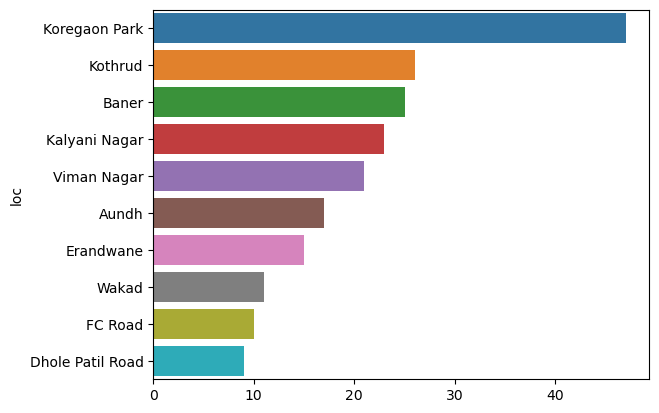

In [58]:
#bar plot

sns.barplot(x=a,y=a.index)



In [59]:
#total number of restaurant by location

Number_of_location=df[['loc','dine_rating']]
a=Number_of_location.groupby("loc")
rest_per_location=a.size()



In [60]:
rest_per_location=rest_per_location.sort_values(ascending=False)
rest_per_location

loc
Kothrud                           264
Wakad                             225
Viman Nagar                       224
Baner                             219
Hinjawadi                         213
                                 ... 
Rahul Complex, Kothrud              1
Bopkhel                             1
St Laurn Hotel, Koregaon Park       1
Super Mall                          1
 Hotel Satish Executive, Wakad      1
Length: 193, dtype: int64

In [61]:
rest_per_location[:10]

loc
Kothrud            264
Wakad              225
Viman Nagar        224
Baner              219
Hinjawadi          213
Hadapsar           183
Kharadi            180
Sinhgad Road       142
Pimple Saudagar    134
Koregaon Park      123
dtype: int64

In [62]:
#now we want to find 
#(number of rest which got more than 4.2/ total number of rest) per location
#we are concatinating two series together
frames=[rest_per_location,location_wise_best]
data_n=pd.concat(
    frames,
    axis=1,
    join="inner",
    ignore_index=False,
    copy=True,
)

In [63]:
data_n

,0,1
loc,,
Kothrud,264,26
Wakad,225,11
Viman Nagar,224,21
Baner,219,25
Hinjawadi,213,7
...,...,...
"The Mills, Bund Garden Road",1,1
"The E-Square Hotel, Shivaji Nagar",1,1
"Creaticity Mall, Yerawada",1,1


In [64]:
data_n[0]

loc
Kothrud                              264
Wakad                                225
Viman Nagar                          224
Baner                                219
Hinjawadi                            213
                                    ... 
The Mills, Bund Garden Road            1
The E-Square Hotel, Shivaji Nagar      1
Creaticity Mall, Yerawada              1
Panchshil Tech Park, Yerawada          1
Parichay Hotel, FC Road                1
Name: 0, Length: 91, dtype: int64

In [65]:
print(len(data_n[0].values))

91


In [66]:
data_n['popularity_percentage']=list(map(lambda t: (t[1]/t[0])*100, zip(data_n[0], data_n[1])))


In [67]:
data_n

,0,1,popularity_percentage
loc,,,
Kothrud,264,26,9.848485
Wakad,225,11,4.888889
Viman Nagar,224,21,9.375000
Baner,219,25,11.415525
Hinjawadi,213,7,3.286385
...,...,...,...
"The Mills, Bund Garden Road",1,1,100.000000
"The E-Square Hotel, Shivaji Nagar",1,1,100.000000
"Creaticity Mall, Yerawada",1,1,100.000000


In [68]:
data_updated=data_n[data_n[0]>100]

In [69]:
data_updated

,0,1,popularity_percentage
loc,,,
Kothrud,264,26,9.848485
Wakad,225,11,4.888889
Viman Nagar,224,21,9.375000
Baner,219,25,11.415525
Hinjawadi,213,7,3.286385
Hadapsar,183,3,1.639344
Kharadi,180,8,4.444444
Sinhgad Road,142,6,4.225352
Pimple Saudagar,134,7,5.223881


In [70]:
data_updated=data_updated.sort_values(by="popularity_percentage",ascending=False)

In [71]:
data_updated

,0,1,popularity_percentage
loc,,,
Koregaon Park,123,47,38.211382
Aundh,113,17,15.044248
Baner,219,25,11.415525
Kothrud,264,26,9.848485
Viman Nagar,224,21,9.375000
Pimple Saudagar,134,7,5.223881
Wakad,225,11,4.888889
Kharadi,180,8,4.444444
Sinhgad Road,142,6,4.225352


In [72]:
sns.barplot(data_updated['popularity_percentage'],data_updated.index)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

These are the best locations in pune where find the high rated restaurants

Koregaun Park has the highest popuarity percentage out of all the locations in pune

# THE END
